In [22]:
'''
:@Author: Xiangyu Zhao
:@Date: 8/19/2023, 5:47:20 AM
:@LastEditors: Xiangyu Zhao
:@LastEditTime: 8/19/2023, 5:47:20 AM
:Description: 
:Copyright: Copyright (©)}) 2023 Xiangyu Zhao. All rights reserved.
'''
import torch
import math
import matplotlib.pyplot as plt
import numpy

tensor([-6.2832e+00, -6.0319e+00, -5.7805e+00, -5.5292e+00, -5.2779e+00,
        -5.0265e+00, -4.7752e+00, -4.5239e+00, -4.2726e+00, -4.0212e+00,
        -3.7699e+00, -3.5186e+00, -3.2673e+00, -3.0159e+00, -2.7646e+00,
        -2.5133e+00, -2.2619e+00, -2.0106e+00, -1.7593e+00, -1.5080e+00,
        -1.2566e+00, -1.0053e+00, -7.5398e-01, -5.0265e-01, -2.5133e-01,
         5.5806e-15,  2.5133e-01,  5.0265e-01,  7.5398e-01,  1.0053e+00,
         1.2566e+00,  1.5080e+00,  1.7593e+00,  2.0106e+00,  2.2619e+00,
         2.5133e+00,  2.7646e+00,  3.0159e+00,  3.2673e+00,  3.5186e+00,
         3.7699e+00,  4.0212e+00,  4.2726e+00,  4.5239e+00,  4.7752e+00,
         5.0265e+00,  5.2779e+00,  5.5292e+00,  5.7805e+00,  6.0319e+00])


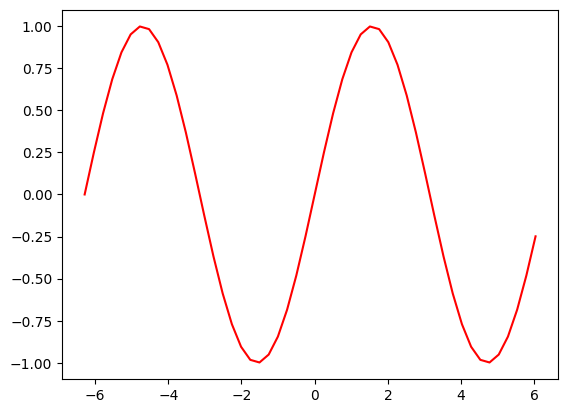

In [23]:
#常量都取出来，以便改动
EPOCH=1500
MLP_LR=0.01
left,right=-2,2
PI=math.pi
NUM=50

# x,y 是普通sinx 的torch tensor
x =torch.tensor([(num * PI)  for num in numpy.arange(left, right,(right-left)/NUM)],dtype=torch.float32)
print(x)
y = torch.sin(x)
plt.plot(x,y,color='red')
plt.show()

In [24]:
class MLP(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=torch.nn.Linear(1,20)
        self.layer2=torch.nn.Linear(20,20)
        self.layer3=torch.nn.Linear(20,1)

    def forward(self,x):
        x=self.layer1(x)
        x=torch.nn.functional.relu(x)

        x=self.layer2(x)
        x=torch.nn.functional.relu(x)

        x=self.layer3(x)

        return  x

In [32]:
mlp=MLP()

# input_x和labels是训练网络时候用的输入和标签。
input_x=x.reshape(-1, 1)
labels=y.reshape(-1,1)
input_x=input_x
labels=labels

#训练mlp
mlp_optimizer=torch.optim.Adam(mlp.parameters(), lr=MLP_LR)
mlp_loss=[]
for epoch in range(EPOCH):
    preds=mlp(input_x)
    loss=torch.nn.functional.mse_loss(preds,labels)

    mlp_optimizer.zero_grad()
    loss.backward()
    mlp_optimizer.step()
    mlp_loss.append(loss.item())
    # print('1:   ',loss.item())

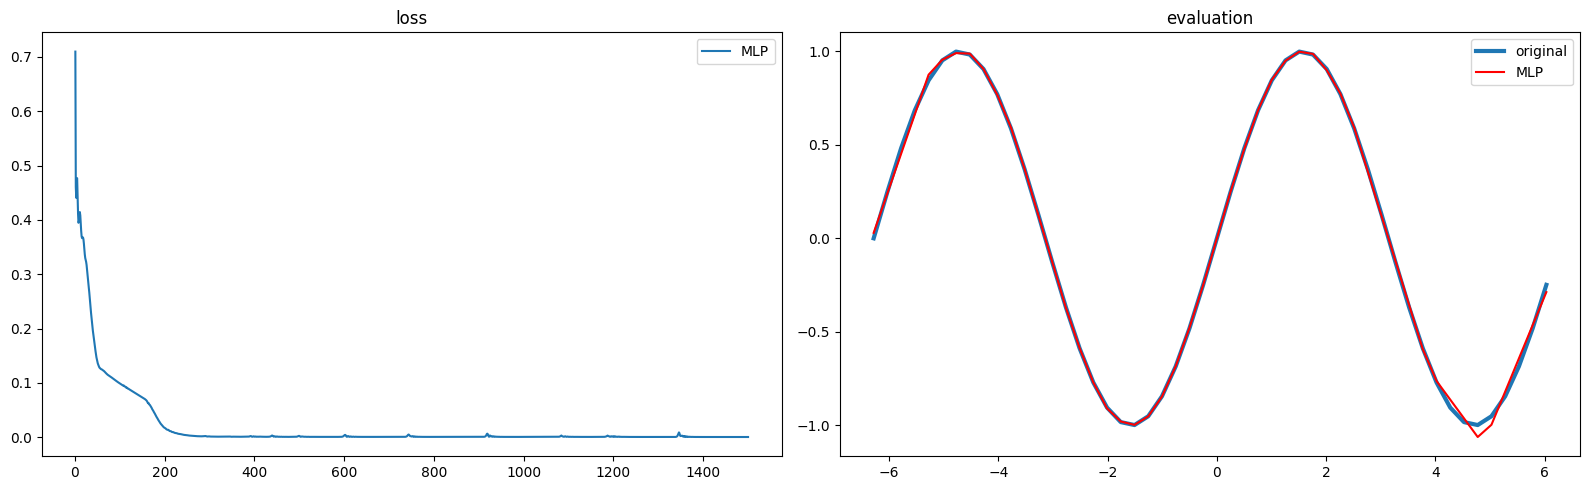

In [33]:
def PlotMLP(mlp,  input_x, x):
    # input_x 是输入网络的x。
    # sin_x 是列表，x的取值，一维数据、
    # 虽然他们的内容（不是维度）是一样的。可以print shape看一下。
    mlp_eval = mlp.eval()
    # mlp_y_np=[]
    # rnn_y_np=[]
    mlp_y = mlp_eval(input_x)
    # for i in range(mlp_y):
    #     mlp_y_np.append(i.detach().numpy())
    # for i in range(rnn_y):
    #     rnn_y_np.append(i.detach().numpy())
    mlp_y_np=mlp_y.cpu().detach().numpy()

    plt.figure(figsize=(16, 5))

    plt.subplot(121)
    plt.plot([i + 1 for i in range(EPOCH)], mlp_loss, label='MLP')
    plt.title('loss')
    plt.legend()

    plt.subplot(122)
    plt.plot(x, torch.sin(x), label="original", linewidth=3)
    plt.plot(x, [y[0] for y in mlp_y_np], label='MLP',color='red')
    plt.title('evaluation')
    plt.legend()

    plt.tight_layout()
    plt.show()
PlotMLP(mlp,input_x,x)

In [29]:
for name,para in mlp.named_parameters():
    print(name,para.numel(),para.data.tolist())

layer1.weight 20 [[-0.6962701678276062], [0.3637116551399231], [-0.726610004901886], [-0.7485970258712769], [0.7454153299331665], [-0.3130756914615631], [-0.2359679788351059], [0.3581436574459076], [-0.1647895872592926], [0.04639899358153343], [0.043893493711948395], [-0.46793535351753235], [-0.48352277278900146], [-0.2266470491886139], [0.7466880083084106], [-1.0863927602767944], [0.3858320713043213], [-0.25158455967903137], [0.04686252400279045], [0.8410008549690247]]
layer1.bias 20 [-0.008202414028346539, -0.044571805745363235, -0.49940139055252075, 0.3572082221508026, -0.5102548599243164, 1.3071136474609375, 1.1986943483352661, 1.6097184419631958, -0.07544053345918655, 0.35363611578941345, 0.4892706871032715, -0.26527151465415955, -0.6073481440544128, -0.1921701729297638, 0.8953238129615784, 0.2968761622905731, -0.6871722340583801, -0.23000194132328033, -0.6452789902687073, 0.5403294563293457]
layer2.weight 400 [[0.05430370569229126, -0.1171327605843544, 0.20109058916568756, 0.2511

In [34]:
torch.save(mlp,'mlp.pt')